<font size=5> Planar data classification with one hidden layer——具有一个隐藏层的平面数据分类

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline


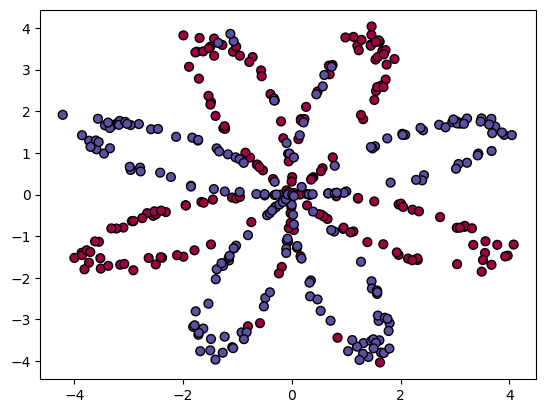

In [27]:
#  加载二维数据X和对应的标签Y
X, Y = load_planar_dataset()
#  绘制散点图，横坐标为X的第一行，纵坐标为X的第二行，颜色由Y确定，点大小为40，使用Spectral颜色映射，边框为黑色
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral,edgecolors='k')

In [28]:
# noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

# datasets = {"noisy_circles": noisy_circles,
#             "noisy_moons": noisy_moons,
#             "blobs": blobs,
#             "gaussian_quantiles": gaussian_quantiles}

# dataset = "noisy_moons"

# X, Y = datasets[dataset]
# X, Y = X.T, Y.reshape(1, Y.shape[0])

# if dataset == "blobs":
#     Y = Y % 2

# plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral, edgecolors='k')

In [29]:
# 获取X矩阵的形状
shape_X = X.shape
# 获取Y矩阵的形状
shape_Y = Y.shape
# 获取Y矩阵中的训练样本数m
m = Y.shape[1]

# 打印X矩阵的形状
print('The shape of X is: ' + str(shape_X))
# 打印Y矩阵的形状
print('The shape of Y is: ' + str(shape_Y))
# 打印训练样本数m
print('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [30]:
#  创建逻辑回归CV分类器  clf
clf = sklearn.linear_model.LogisticRegressionCV()

#  使用clf对特征矩阵X.T进行拟合，标签矩阵Y.T为其目标值
clf.fit(X.T, Y.T)

d:\software\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


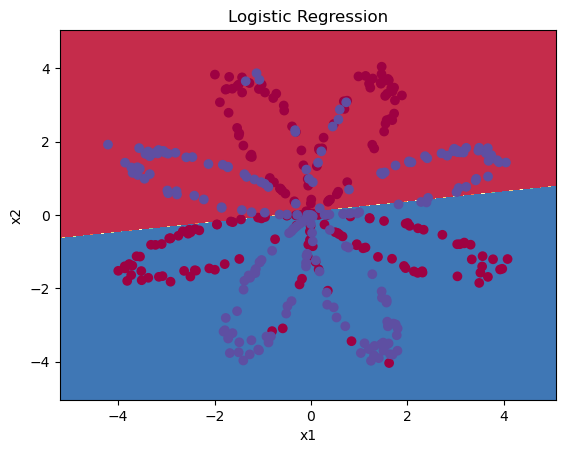

In [31]:
# 以clf.predict(x)为函数，以X和Y为自变量来绘制决策边界
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
# 设置图标题为“Logistic Regression”
plt.title("Logistic Regression")

# 使用clf.predict(X.T)预测结果
LR_predictions = clf.predict(X.T)
# 使用准确率公式计算准确率并输出
print('Accuracy of logistic regression: %d ' % float(
    (np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100) +
      '% ' + "(percentage of correctly labelled datapoints)")

In [32]:
# 定义一个函数，接受两个参数：输入矩阵X和输出矩阵Y
def layer_sizes(X, Y):
    # 获取输入矩阵X的行数，作为输入层的神经元个数
    n_x = X.shape[0]
    # 定义隐藏层神经元个数为4个
    n_h = 4
    # 获取输出矩阵Y的行数，作为输出层的神经元个数
    n_y = Y.shape[0]
    # 返回一个包含n_x、n_h、n_y的元组 (tuple)
    return (n_x, n_h, n_y)

In [33]:
#  调用函数  layer_sizes()，返回三个值，分别为输入层、隐藏层和输出层的大小
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
#  输出信息，显示输入层、隐藏层和输出层的大小
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [34]:
# 定义初始化参数函数，n_x为输入层神经元个数，n_h为隐藏层神经元个数，n_y为输出层神经元个数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # 此处设置随机种子，保证每次运行结果一致

    # 使用随机数初始化W1，W2，b1，b2
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))

    # 确保W1，b1，W2，b2的维度符合要求
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    # 将参数打包成字典形式
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters # 返回参数字典

In [35]:
# 获取测试用例中所需的参数n_x, n_h, n_y
n_x, n_h, n_y = initialize_parameters_test_case()

# 使用参数初始化神经网络的所有参数
parameters = initialize_parameters(n_x, n_h, n_y)

# 输出初始化的参数W1、b1、W2、b2
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [36]:
# 前向传播函数，输入参数为X和parameters
def forward_propagation(X, parameters):
    # 从parameters中获取W1、b1、W2、b2，分别赋值给变量W1、b1、W2、b2
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 计算第一层的Z1和A1，其中Z1由W1和X的点积加上偏置项b1计算得出，A1通过tanh函数计算得出
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    # 计算第二层的Z2和A2，其中Z2由W2和A1的点积加上偏置项b2计算得出，A2通过sigmoid函数计算得出
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # 使用assert断言来确保A2的形状为(1, X.shape[1])
    assert (A2.shape == (1, X.shape[1]))
    
    # 将Z1、A1、Z2、A2保存到字典cache中
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    # 返回A2和cache两个值
    return A2, cache

In [37]:
# 加载测试数据集，X_assess为输入特征，parameters为待训练参数
X_assess, parameters = forward_propagation_test_case()

# 前向传播，得到预测结果A2和缓存值cache
A2, cache = forward_propagation(X_assess, parameters)

# 输出缓存中Z1、A1、Z2和A2的平均值
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [38]:
def compute_cost(A2, Y, parameters):
    # 获取Y矩阵中的训练样本数m
    m = Y.shape[1]

    # 获取W1,W2参数
    W1 = parameters['W1']
    W2 = parameters['W2']

    # 计算 logprobs
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    # 计算代价
    cost = - np.sum(logprobs) / m

    # 压缩代价
    cost = np.squeeze(cost)
    assert (isinstance(cost, float))

    return cost

In [39]:
#  加载测试数据
A2, Y_assess, parameters = compute_cost_test_case()
#  计算并输出代价
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


In [40]:
#  计算反向传播过程中的梯度
def backward_propagation(parameters, cache, X, Y):
    #  获取样本数m
    m = X.shape[1]

    # 获取参数
    W1 = parameters['W1']
    W2 = parameters['W2']

    # 获取缓存中的激活值
    A1 = cache['A1']
    A2 = cache['A2']

    # 反向传播计算各参数的梯度
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # 将各参数的梯度存放在grads中
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads


In [41]:
# 获取测试数据
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

# 计算反向传播的梯度
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
# 输出反向传播的梯度
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [42]:
#  更新模型参数
def update_parameters(parameters, grads, learning_rate=1.2):
    # 获取模型参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # 获取梯度值
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # 根据梯度值更新参数
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # 将更新后的参数重新存储到字典中
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [43]:
parameters, grads = update_parameters_test_case() # 获取测试用例中的参数和梯度
parameters = update_parameters(parameters, grads) # 使用梯度下降算法更新参数

print("W1 = " + str(parameters["W1"])) # 输出更新后的参数 W1
print("b1 = " + str(parameters["b1"])) # 输出更新后的参数 b1
print("W2 = " + str(parameters["W2"])) # 输出更新后的参数 W2
print("b2 = " + str(parameters["b2"])) # 输出更新后的参数 b2


W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [44]:
#  两层神经网络模型
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)  # 设置随机种子以便结果可重复

    # 获取输入层、隐藏层和输出层的神经元数量
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # 初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    for i in range(0, num_iterations):

        # 前向传播
        A2, cache = forward_propagation(X, parameters)

        # 计算损失
        cost = compute_cost(A2, Y, parameters)

        # 反向传播
        grads = backward_propagation(parameters, cache, X, Y)

        # 更新参数
        parameters = update_parameters(parameters, grads)

        # 每隔1000次迭代输出一次损失
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [45]:
#  获取用于测试的数据集
X_assess, Y_assess = nn_model_test_case()

#  对其进行训练
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
#  打印训练参数
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\12516\AppData\Local\Temp\ipykernel_18700\570300214.py:10: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
d:\Code\vscode\python\deep learning\1-part1\2-one hidden layer\planar_utils.py:24: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18494482  5.33220319]
 [-7.52989354  1.24306197]
 [-4.19295428  5.32631786]
 [ 7.52983748 -1.24309404]]
b1 = [[ 2.32926815]
 [ 3.7945905 ]
 [ 2.33002544]
 [-3.79468791]]
W2 = [[-6033.83672179 -6008.12981272 -6033.10095329  6008.06636901]]
b2 = [[-52.66607704]]


In [46]:
def predict(parameters, X):

    #  计算前向传播过程，得到输出层的输出结果 A2 和缓存变量 cache
    A2, cache = forward_propagation(X, parameters)
    #  然后将输出结果 A2 进行四舍五入操作，将其转换为二分类的预测结果。将这个结果保存到变量 predictions 中
    predictions = np.round(A2)

    return predictions

In [47]:
#  获取测试数据集X_assess和模型参数
parameters, X_assess = predict_test_case()
#  预测测试集X_assess中的结果
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219504
Cost after iteration 9000: 0.218571


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

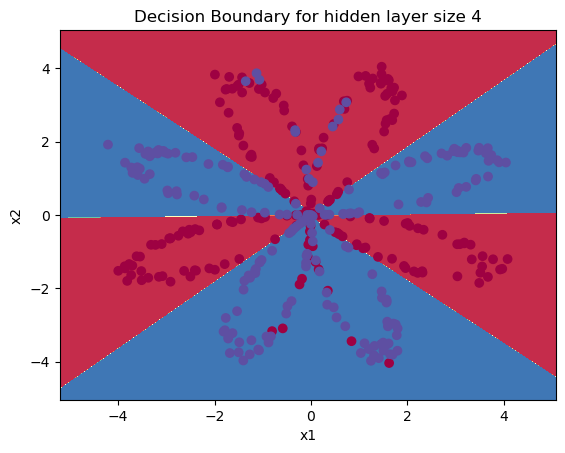

In [48]:
# 使用 4 个隐藏神经元的神经网络进行训练
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# 用 lambda 表达式将 predict 函数作为参数传递给 plot_decision_boundary 函数
# 这样它将预测函数应用于所有点，并对点进行分类
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# 设置图形标题
plt.title("Decision Boundary for hidden layer size " + str(4))


In [49]:
#  调用 predict 函数计算在训练集 X 上的预测结果
predictions = predict(parameters, X)
#  使用 numpy 中的向量点积函数 np.dot 计算 Y 和 predictions.T 之间的点积和 1 - Y 和 (1 - predictions.T) 之间的点积，以得到预测结果的正确数和错误数
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.75 %


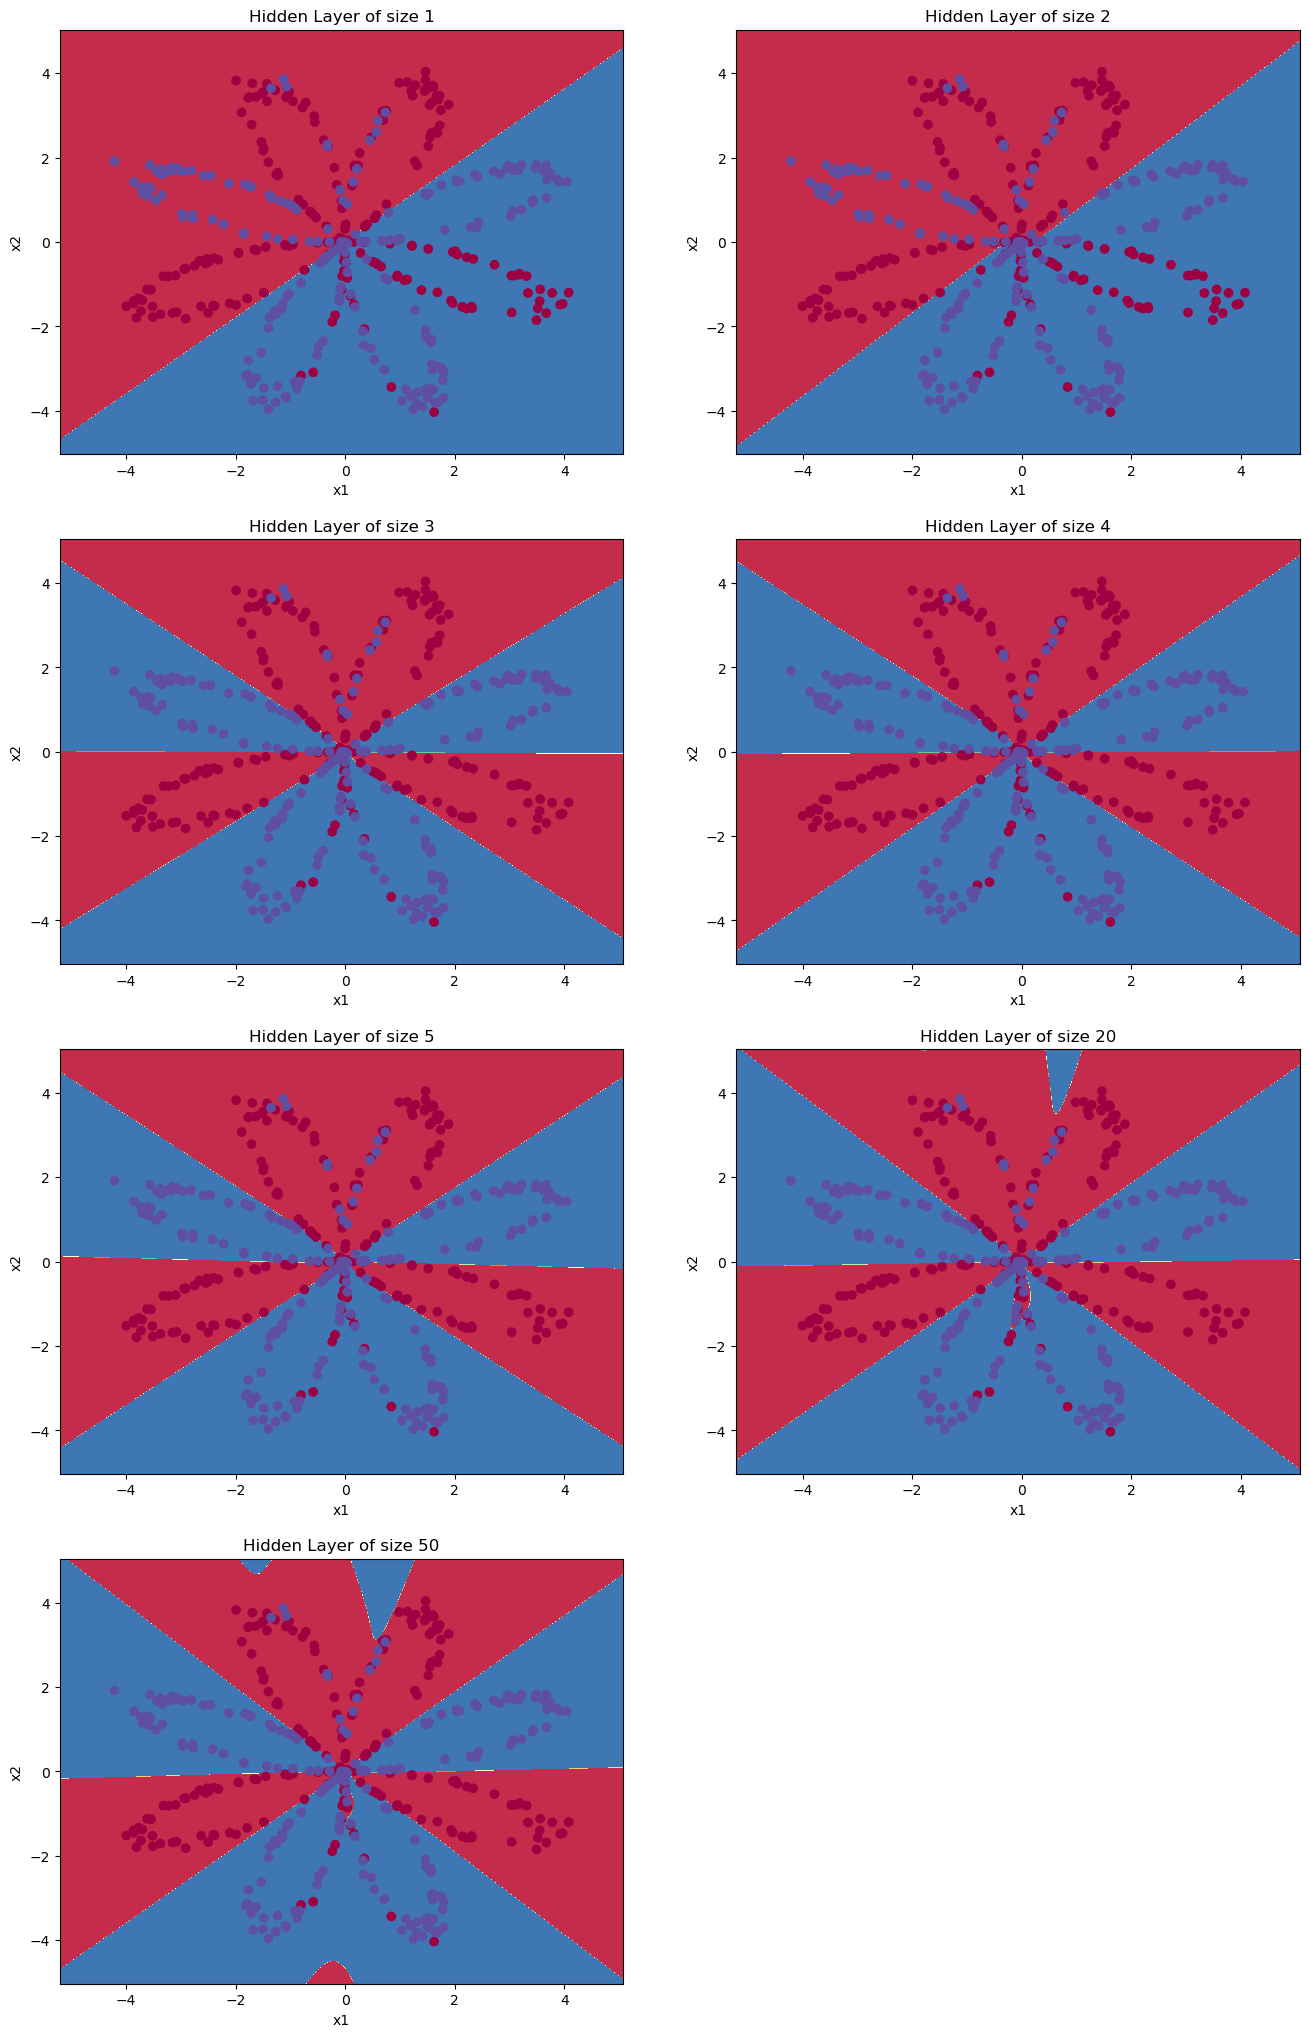

In [50]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))